In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
# PassengerId: Unique identifier for each passenger.
# Survived: Survival status of the passenger (0 = Not Survived, 1 = Survived).
# Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class).
# Sex: Gender of the passenger.
# Age: Age of the passenger.
# SibSp: Number of siblings/spouses aboard the Titanic.
# Parch: Number of parents/children aboard the Titanic.
# Fare: Fare paid by the passenger.
# Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [54]:
x_y_train = pd.read_csv("titanic/train.csv", index_col="PassengerId")
x_y_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [55]:
x_y_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [56]:
x_y_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [57]:
x_y_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [58]:
x_y_train["Name"].nunique()

891

In [59]:
x_y_train = x_y_train.drop("Name", axis=1)
x_y_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,female,19.0,0,0,112053,30.0000,B42,S
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [60]:
x_y_train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
LabelEncoder() 

LabelEncoder()

In [63]:
x_y_train["Sex"] = LabelEncoder().fit_transform(x_y_train["Sex"])
x_y_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,0,35.0,1,0,113803,53.1000,C123,S
5,0,3,1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,211536,13.0000,NaN,S
888,1,1,0,19.0,0,0,112053,30.0000,B42,S
889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [64]:
x_y_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [65]:
x_y_train["Fare"].nunique()

248

In [66]:
x_y_train["Fare"].isnull().sum()

np.int64(0)

In [67]:
x_y_train["Ticket"].nunique()

681

In [68]:
x_y_train["Ticket"].isnull().sum()

np.int64(0)

In [69]:
x_y_train = x_y_train.drop("Ticket", axis=1)
x_y_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,NaN,S
2,1,1,0,38.0,1,0,71.2833,C85,C
3,1,3,0,26.0,0,0,7.9250,NaN,S
4,1,1,0,35.0,1,0,53.1000,C123,S
5,0,3,1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,NaN,S
888,1,1,0,19.0,0,0,30.0000,B42,S
889,0,3,0,NaN,1,2,23.4500,NaN,S


In [70]:
x_y_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [71]:
x_y_train["Embarked"].isnull().sum()

np.int64(2)

In [72]:
x_y_train[x_y_train["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
62,1,1,0,38.0,0,0,80.0,B28,NaN
830,1,1,0,62.0,0,0,80.0,B28,NaN


In [73]:
x_y_train["Embarked"] = LabelEncoder().fit_transform(x_y_train["Embarked"])
x_y_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,NaN,2
2,1,1,0,38.0,1,0,71.2833,C85,0
3,1,3,0,26.0,0,0,7.9250,NaN,2
4,1,1,0,35.0,1,0,53.1000,C123,2
5,0,3,1,35.0,0,0,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,NaN,2
888,1,1,0,19.0,0,0,30.0000,B42,2
889,0,3,0,NaN,1,2,23.4500,NaN,2


In [74]:
x_y_train[x_y_train["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,


In [75]:
x_y_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked      int64
dtype: object

In [76]:
x_y_train["Cabin"]

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [77]:
x_y_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [78]:
x_y_train["Cabin"].nunique()

147

In [82]:
cabins = list(set(x_y_train["Cabin"].unique()))

In [87]:
fisrt_letters = list(set([str(cab)[0] for cab in cabins]))
fisrt_letters

['G', 'F', 'T', 'C', 'D', 'E', 'n', 'A', 'B']

In [88]:
len(fisrt_letters)

9

In [91]:
x_y_train["Cabin_first"] = x_y_train["Cabin"].str[0]
x_y_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_first
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,NaN,2,NaN
2,1,1,0,38.0,1,0,71.2833,C85,0,C
3,1,3,0,26.0,0,0,7.9250,NaN,2,NaN
4,1,1,0,35.0,1,0,53.1000,C123,2,C
5,0,3,1,35.0,0,0,8.0500,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,NaN,2,NaN
888,1,1,0,19.0,0,0,30.0000,B42,2,B
889,0,3,0,NaN,1,2,23.4500,NaN,2,NaN


In [92]:
x_y_train["Cabin_first"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [94]:
x_y_train["Cabin_first"] = LabelEncoder().fit_transform(x_y_train["Cabin_first"])
x_y_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_first
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,NaN,2,8
2,1,1,0,38.0,1,0,71.2833,C85,0,2
3,1,3,0,26.0,0,0,7.9250,NaN,2,8
4,1,1,0,35.0,1,0,53.1000,C123,2,2
5,0,3,1,35.0,0,0,8.0500,NaN,2,8
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,NaN,2,8
888,1,1,0,19.0,0,0,30.0000,B42,2,1
889,0,3,0,NaN,1,2,23.4500,NaN,2,8


In [95]:
x_y_train.dtypes

Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int64
Cabin_first      int64
dtype: object

In [99]:
x_y_train = x_y_train.drop("Cabin", axis=1)
x_y_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_first
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2,8
2,1,1,0,38.0,1,0,71.2833,0,2
3,1,3,0,26.0,0,0,7.9250,2,8
4,1,1,0,35.0,1,0,53.1000,2,2
5,0,3,1,35.0,0,0,8.0500,2,8
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2,8
888,1,1,0,19.0,0,0,30.0000,2,1
889,0,3,0,NaN,1,2,23.4500,2,8


In [100]:
x_y_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_first
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517,-0.301116
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112,0.746616
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057,0.123076
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252,-0.267270
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654,0.041540
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322,-0.032548
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226,-0.523013
Embarked,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000,0.187015
Cabin_first,-0.301116,0.746616,0.123076,-0.267270,0.041540,-0.032548,-0.523013,0.187015,1.000000


# pip install seaborn

In [101]:
import seaborn as sns

<Axes: >

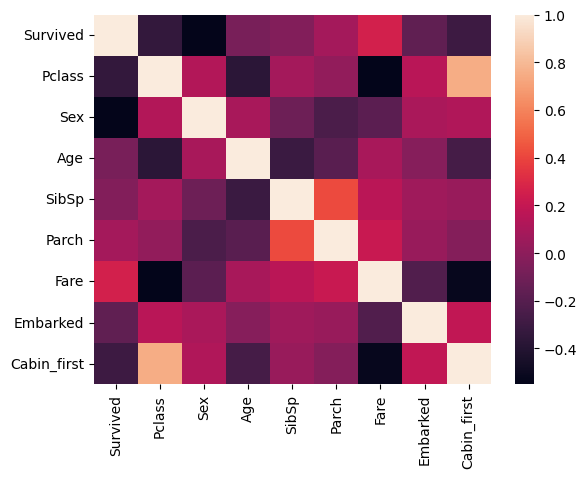

In [102]:
sns.heatmap(x_y_train.corr())

<Axes: >

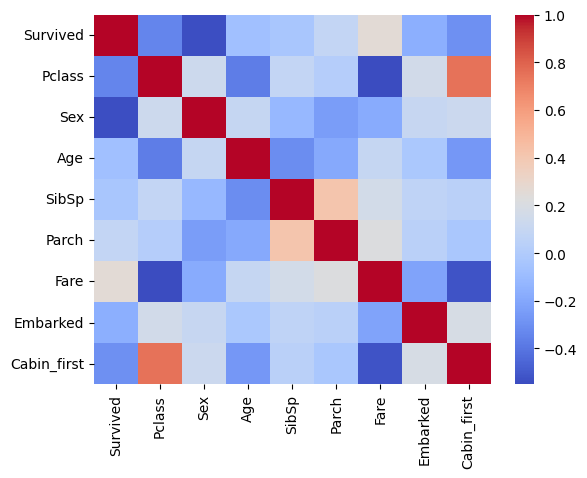

In [103]:
sns.heatmap(x_y_train.corr(), cmap="coolwarm")

In [104]:
x_y_train.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_first
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2,8
2,1,1,0,38.0,1,0,71.2833,0,2
3,1,3,0,26.0,0,0,7.9250,2,8
4,1,1,0,35.0,1,0,53.1000,2,2
5,0,3,1,35.0,0,0,8.0500,2,8
6,0,3,1,NaN,0,0,8.4583,1,8


Text(0, 0.5, 'Gender 0 - female  1 - male')

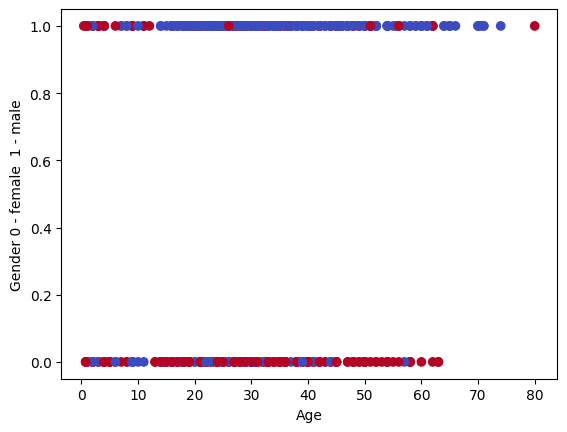

In [113]:
x_y_train["Survived"], x_y_train["Sex"] , x_y_train["Age"]
plt.scatter(x_y_train["Age"], x_y_train["Sex"], c=x_y_train["Survived"], cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Gender 0 - female  1 - male")

In [119]:
plt.rcParams["figure.figsize"] # default [6.4, 4.8]

[6.4, 4.8]

In [120]:
plt.rcParams["figure.figsize"] = [12.8, 4.8]

Text(0, 0.5, 'Gender 0 - female  1 - male')

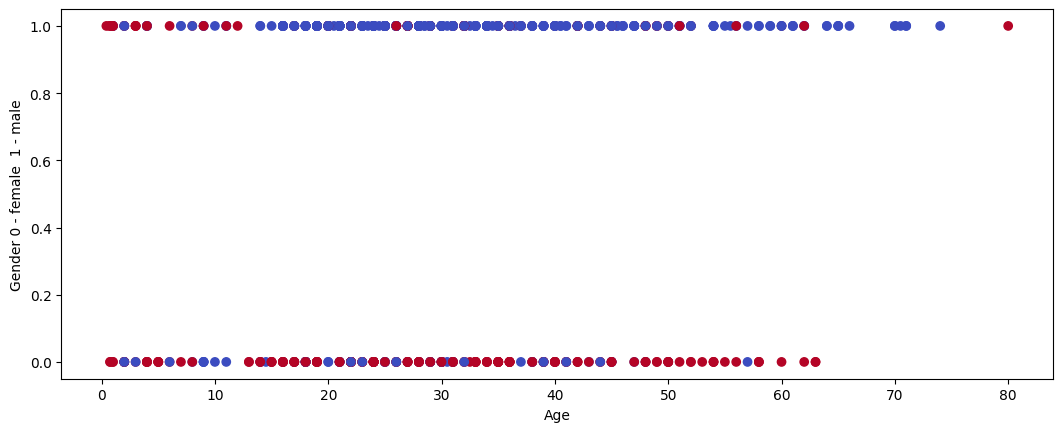

In [121]:
x_y_train["Survived"], x_y_train["Sex"] , x_y_train["Age"]
plt.scatter(x_y_train["Age"], x_y_train["Sex"], c=x_y_train["Survived"], cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Gender 0 - female  1 - male")

Text(0, 0.5, 'Gender 0 - female  1 - male')

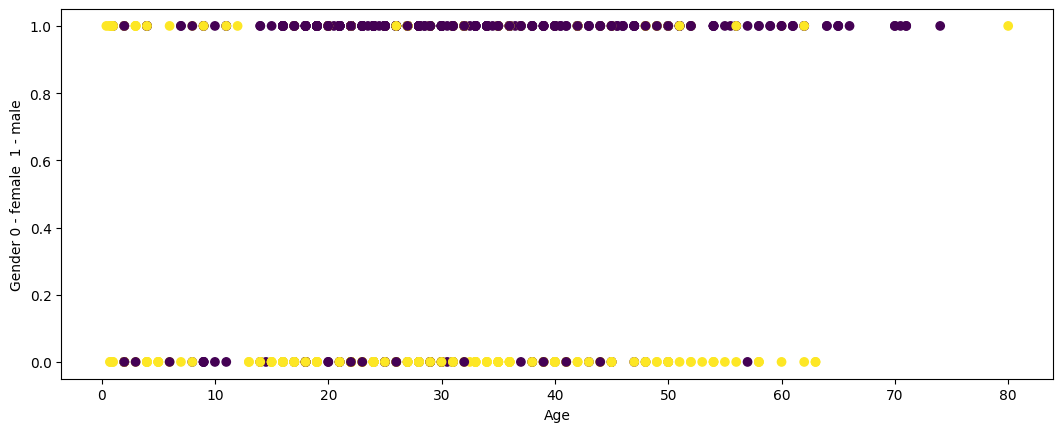

In [122]:
x_y_train["Survived"], x_y_train["Sex"] , x_y_train["Age"]
plt.scatter(x_y_train["Age"], x_y_train["Sex"], c=x_y_train["Survived"])
plt.xlabel("Age")
plt.ylabel("Gender 0 - female  1 - male")

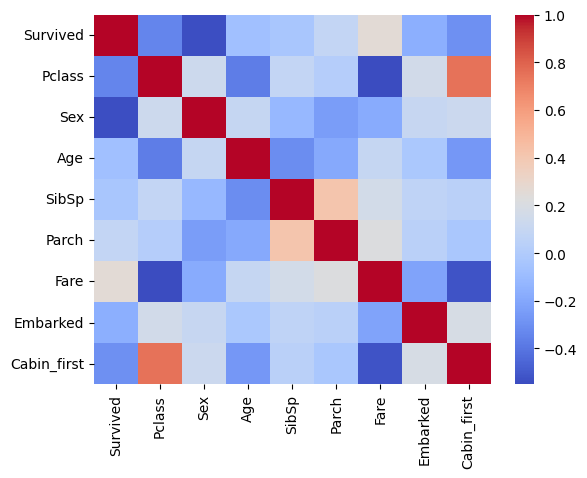

In [124]:
plt.rcParams["figure.figsize"] = [6.4, 4.8]
sns.heatmap(x_y_train.corr(), cmap="coolwarm")


plt.rcParams["figure.figsize"] = [12.8, 4.8]

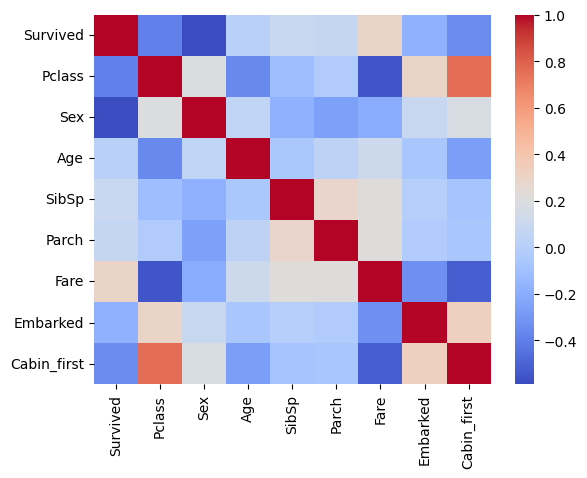

In [128]:
adult_x_y_train = x_y_train[x_y_train["Age"] > 15]

plt.rcParams["figure.figsize"] = [6.4, 4.8]
sns.heatmap(adult_x_y_train.corr(), cmap="coolwarm")


plt.rcParams["figure.figsize"] = [12.8, 4.8]

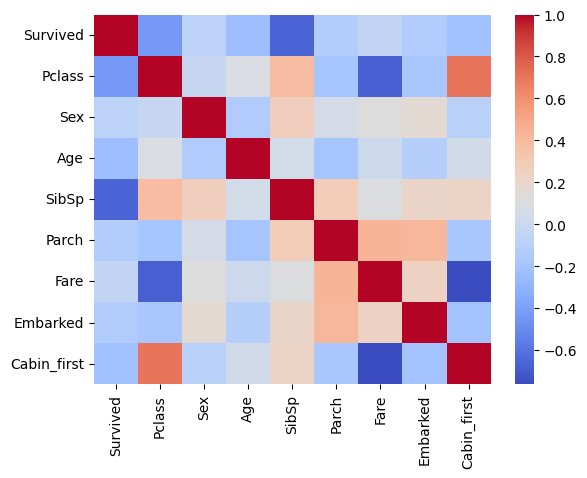

In [127]:
minors_x_y_train = x_y_train[x_y_train["Age"] < 15]

plt.rcParams["figure.figsize"] = [6.4, 4.8]
sns.heatmap(minors_x_y_train.corr(), cmap="coolwarm")


plt.rcParams["figure.figsize"] = [12.8, 4.8]